

# Project: Investigate a Dataset - [No-Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
### Question(s) for Analysis

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
what is the factors that effect the show up of patients ?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.


In [2]:
df=pd.read_csv('C:/Users/Dell/Desktop/Project/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Check data shape and Assess it 

In [3]:
df.shape
#so we know that our data before cleaning was contain 14 columns and 110527 paients

(110527, 14)

In [4]:
df.describe()
# to try to understand the dataset more , there is a wrong with min age -1 so we will check it in cleaning 

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.info()
# so we check the missing value in each row 
#so there is no missing data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# so lets check for duplicates
df.duplicated().sum()
# so there is no duplicated rows data to be deleted

0

In [7]:
# check for duplicated IDs patients
df['PatientId'].duplicated().sum()
#so there is 48228 patientId is duplicated 

48228

In [8]:
#check no of duplicated patiens ids and noshow
#to check th there were patients ids duplicated but differ in show states
df.duplicated(['PatientId','No-show']).sum()
#so there is duplicat 38710 patientId with no-show  so we will remove it in cleaning 

38710


### Data Cleaning 


### as we check from describe there is wrong entry with age = -1 its invalid so we will search how many entry have same value and drop it from dataset

In [9]:
wrong_age=df.query('Age =="-1"')
wrong_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [10]:
df.drop(index=99832 , inplace=True)


In [11]:
# lets check is there is -1 age in dataset or no so we use Describe()
df.describe()
# so we see that min Age = 0 

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### there are 2 columns with misspelling gonna rename them 

In [12]:
# correction of columns names there is 2 wrong names 
#Hipertension to Hypertension   # first time i forgot to inplace=Ture so there was no change just wrote this hint to myself
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
#no-show to no_show to can run queries on it 
df.rename(columns={'No-show':'No_show'},inplace=True)


In [13]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### so in line 8 we just found that there is 38710 Entry are duplicated  so we need to remove them before doing our analysis


In [14]:
#so in line 8 we just found that there is 38710 so we need to remove them before doing our analysis
df.drop_duplicates(['PatientId','No_show'],inplace=True)
# so we will check our data after delete duplicates with .shape
df.shape
#so there is 71816 , rather than 110527 at first 

(71816, 14)

### removing the  unnecessary columns that we will not use them in our analysis

In [15]:
# now lets remove the Un-needed columns that we will not use it in our analysis (EDA)
# so we dont need (1-PatientId , 2-AppointmentID , 3-ScheduledDay , 4-AppointmentDay )
df.drop(columns=['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],inplace=True)

In [16]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


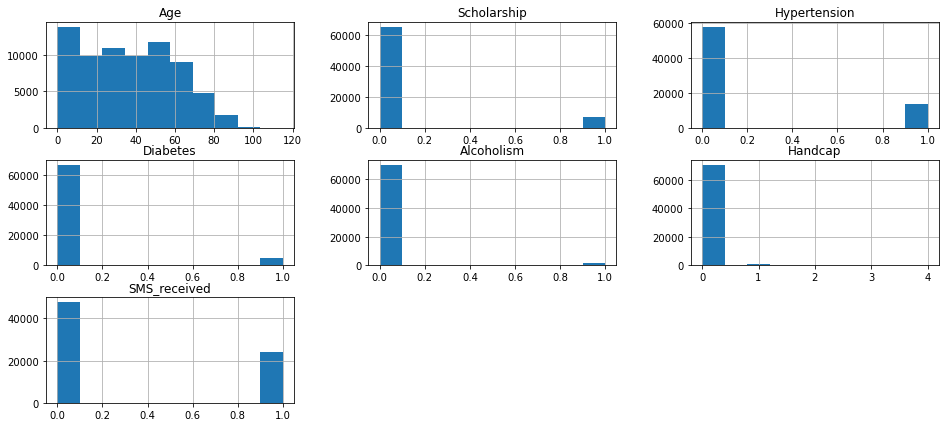

In [17]:
# and before start in EDA phase i will check histogram for all data i have
df.hist(figsize=(16,7));

<a id='eda'></a>
## Exploratory Data Analysis


### im gonna split attendance into to parts 'patients who attend and who not ' most of analysis will done on this two split columns

In [18]:
show =df['No_show']== 'No' # these who attend
no_show=df['No_show']== 'Yes'# these who didnt attend


In [19]:
df[show].count(), df[no_show].count()


(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

In [20]:
df.Age[show].mean()
#

37.22916551252931

In [21]:
df.Age[no_show].mean()

34.37626677234898

### Analysis and visualization i will make analysis according to questions 


### Research Question 1 (Does the Attendance Affected by Age )

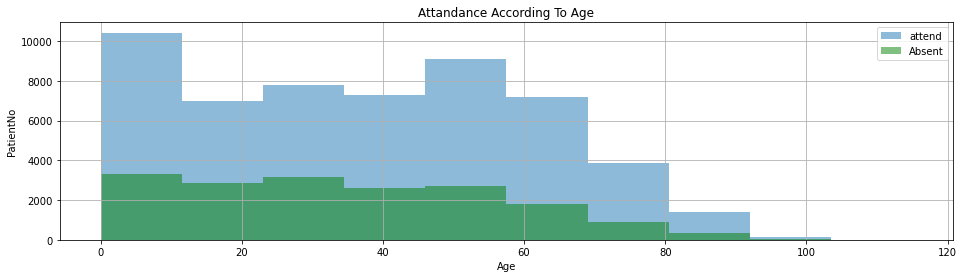

In [22]:
# to see this more clearly we will make histogram to see Age with the attendance 
def attendance(df,column_name,appear,abscent):
# first variable is df the dataset,
#coulmn_name : the coulmn that we willuse it make analysis 
# appar  : dataset with patients who attend 
#abscent : dataset with patients who didnt attend
    plt.figure(figsize=(16,4))
    df[column_name][show].hist( alpha=0.5 ,label='attend')
    df[column_name][no_show].hist(alpha=0.5,color='green',  label='Absent');
    plt.legend();
    plt.xlabel('Age')
    plt.ylabel('PatientNo')
    plt.title("Attandance According To Age")
attendance(df,'Age',show,no_show)

#So from the Histogram we see kids from age 1-12 the highest attend ,from 15-25 lower ,35-44 is more higher, and from 45 to 55 2nd highest  and ppl who's age above 85 almost absents

### Question(2)  does Diabetes and Hypertension diseases with Age affect the attendance  (!)

Text(0.5, 1.0, 'Attandance According To Age')

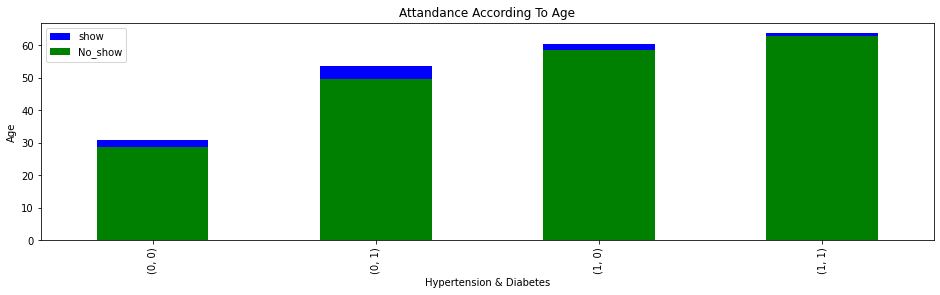

In [23]:
plt.figure(figsize=[16,4])
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',label='show',color='blue')
df[no_show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',label='No_show',color='Green');
plt.legend();
plt.xlabel('Hypertension & Diabetes')
plt.ylabel('Age')
plt.title('Attandance According To Age')


 so from this barPlot the diabetes and hypertensions with age don't affect the attendance at all 

###  Question (3) does Gender affect attendance

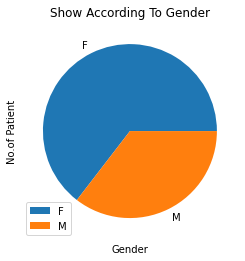

In [24]:
def attendance(df,column_name,appear,abscent):
    df[column_name][show].value_counts().plot(kind='pie',label='show');
    df[column_name][show].value_counts()
    plt.legend();
    plt.xlabel('Gender')
    plt.ylabel('No.of Patient')
    plt.title('Show According To Gender')
attendance(df,'Gender',show,no_show)

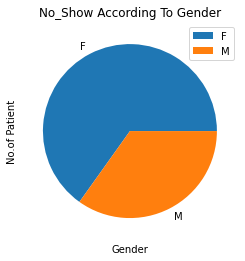

In [25]:
def attendance(df,column_name,appear,abscent):
    df[column_name][no_show].value_counts().plot(kind='pie',label='No_show')
    df[column_name][no_show].value_counts()
    plt.legend();
    plt.xlabel('Gender')
    plt.ylabel('No.of Patient')
    plt.title('No_Show According To Gender')
attendance(df,'Gender',show,no_show)

### so according to this 2 pie plots the gender doesn't affect the Attendance

###  Question (4) (does scholarship affect the attendance)

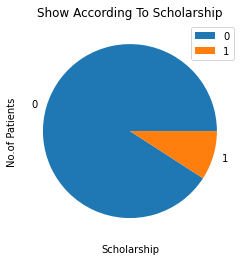

In [26]:
def attendance(df,column_name,appear,abscent):
    df[column_name][show].value_counts().plot(kind='pie')
    plt.legend();
    plt.xlabel('Scholarship')
    plt.ylabel('No.of Patients')
    plt.title('Show According To Scholarship')
attendance(df,'Scholarship',show,no_show)

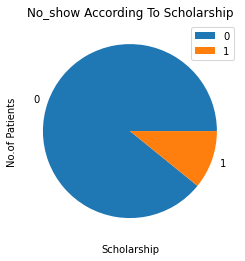

In [27]:
def attendance(df,column_name,appear,abscent):
    df[column_name][no_show].value_counts().plot(kind='pie')
    plt.legend();
    plt.xlabel('Scholarship')
    plt.ylabel('No.of Patients')
    plt.title('No_show According To Scholarship')
attendance(df,'Scholarship',show,no_show)

In [28]:
df.Scholarship[show].value_counts(),df.Scholarship[no_show].value_counts()

(0    49207
 1     4946
 Name: Scholarship, dtype: int64,
 0    15748
 1     1915
 Name: Scholarship, dtype: int64)

so 10 % only of patients who have scholarship attend , 12% of patients who have scholarship don't attend 
### so we get that scholarship doesn't affect the attendance

### Question (5) (Does SMS affect the Attendance)

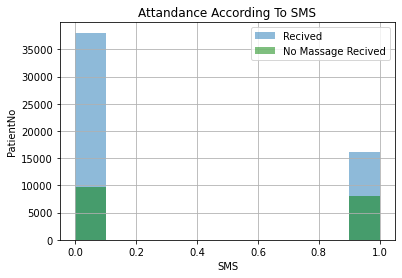

In [29]:
def attendance(df,column_name,appear,abscent):
    df[column_name][show].hist(alpha=0.5,  label='Recived')
    df[column_name][no_show].hist(alpha=0.5,color='green',  label='No Massage Recived');
    plt.xlabel('SMS')
    plt.ylabel('PatientNo')
    plt.title('Attandance According To SMS')
    plt.legend();
attendance(df,'SMS_received',show,no_show)


### no. of patients who didn't get sms and Attend  are more than patients who got sms and Attend
### so you have to go and check ur massage sender System and imporve it 


### Question (6) (Does place affect the attendace (Neighbourhood))

No handles with labels found to put in legend.


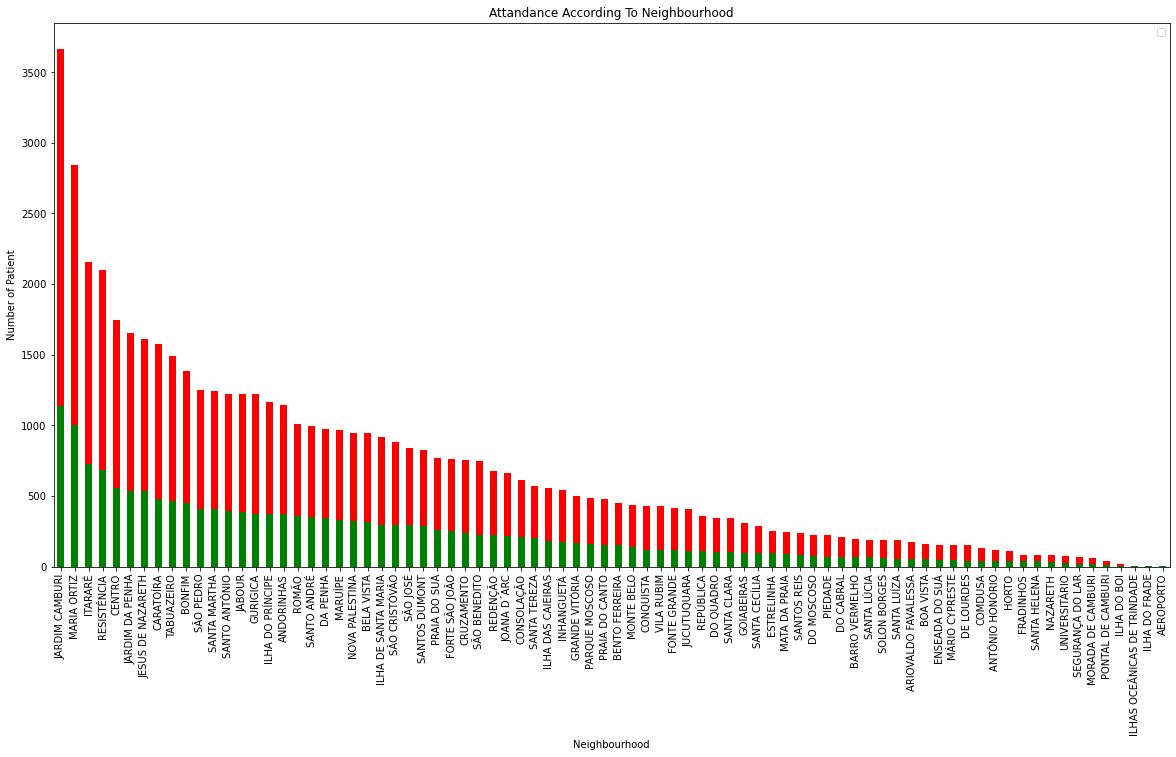

In [30]:
def attendance(df,column_name,appear,abscent):
    plt.legend();
    plt.xlabel('Neighbourhood')
    plt.ylabel('Number of Patient')
    plt.title('Attandance According To Neighbourhood')
    df[column_name][show].value_counts().plot(kind='bar',figsize=(20,10),color='red' ,label='show')
    df[column_name][no_show].value_counts().plot(kind='bar',figsize=(20,10),color='green', label='show');
attendance(df,'Neighbourhood',show,no_show)


###  according to Neighbourhood there is affect on attendance in the bar the attendance is directly prop. with the Neighbourhood

# limitations
we could make the analysis more detailed if there was data about the patients who needs follow-up so we can determine wether the reason may be the doctor is bad  and thats the main reason why patients dont attend and comapare patients who came for first time and with those who come frequently to get more information about attendance 

There is no correlation between attend and gender , scholarship , diabetes& hypertensions and scholarship 

<a id='conclusions'></a>
## My Conclusions
### 1-Attandance is affected by Age we see most of patient who attend are from 1-12 ,  and from 25-35  , patients who above 65 mostly doesn't attend 
### 2-diabetes and hypertensions with age don't affect the attendance at all
### 3-gender doesn't affect the Attendance
### 4-scholarship doesn't affect the attendance
### 5-number of patients who didn't get sms and Attend  are more than patients who got sms and Attend SO
### ("improve Massage Sender System ")("Attandance Affected by SMS sending") 
### 6-according to Neighbourhood there is affect on attendance in the bar the attendance is directly prop. with the Neighbourhood




In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295